In [13]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns
from IPython.display import display

plt.style.use("ggplot")
sns.set()

In [14]:
import matplotlib.image as mpimg
from PIL import Image


def show(path):
    img = mpimg.imread(path)
    sns.reset_orig()
    plt.figure(figsize=(8, 8))
    plt.axis("off")
    plt.imshow(img)
    sns.set()

In [15]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)
display(df.head())
versicolor_petal_length = [X[i][2] for i in range(X.shape[0]) if Y[i] == 1]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Histogram

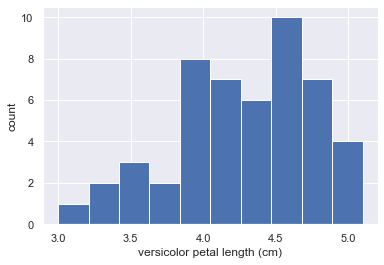

In [16]:
_ = plt.hist(versicolor_petal_length)
_ = plt.xlabel("versicolor petal length (cm)")
_ = plt.ylabel("count")
plt.show()

```The histogram made above had ten bins. This is the default of matplotlib. The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.```

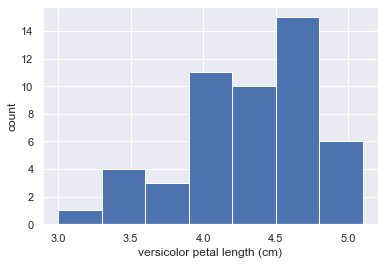

In [17]:
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = int(np.sqrt(n_data))

_ = plt.hist(versicolor_petal_length, bins=n_bins)
_ = plt.xlabel("versicolor petal length (cm)")
_ = plt.ylabel("count")  ## Bee Swarm Plot
plt.show()

## Bee Swarm Plot
```The same data may be interpreted differently depending on choice of bins.```

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


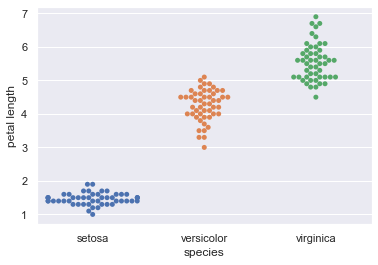

In [18]:
y = Y.reshape((150, 1))
x = np.append(X, y, axis=1)
column_names = iris.feature_names.copy()
column_names.append("species")
df2 = pd.DataFrame(x, columns=column_names)
species_names = ["setosa", "versicolor", "virginica"]
df2[["species"]] = [
    species_names[i.tolist()[0]] for i in np.array(df2[["species"]], dtype="int")
]
display(df2.head())
# Create bee swarm plot with Seaborn's default settings
_ = sns.swarmplot(x="species", y="petal length (cm)", data=df2)
_ = plt.xlabel("species")
_ = plt.ylabel("petal length")
plt.show()
# virginica petals tend to be the longest, and setosa petals tend to be
# the shortest of the three species.

## ECDF
```Large amount of data generally results in overlapping of swarmplot and thus is not ideal for big data. Thus we will now see the empirical cumulative distibution functions (ECDFs).```

In [19]:
def ecdf(data):
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n + 1) / n
    return x, y

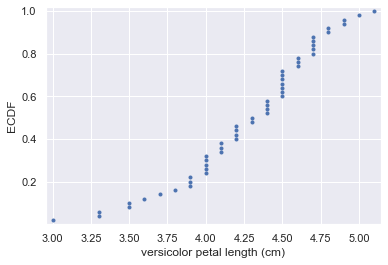

In [20]:
x_vers, y_vers = ecdf(versicolor_petal_length)
_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")
_ = plt.xlabel("versicolor petal length (cm)")
_ = plt.ylabel("ECDF")
plt.margins(0.02)
plt.show()

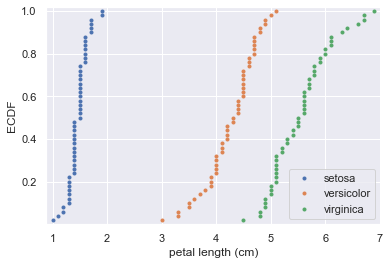

In [21]:
setosa_petal_length = [X[i][2] for i in range(X.shape[0]) if Y[i] == 0]
virginica_petal_length = [X[i][2] for i in range(X.shape[0]) if Y[i] == 2]

x_set, y_set = ecdf(setosa_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

_ = plt.plot(x_set, y_set, marker=".", linestyle="none")
plt.margins(0.02)

_ = plt.plot(x_vers, y_vers, marker=".", linestyle="none")
plt.margins(0.02)

_ = plt.plot(x_virg, y_virg, marker=".", linestyle="none")
plt.margins(0.02)

plt.legend(("setosa", "versicolor", "virginica"), loc="lower right")
_ = plt.xlabel("petal length (cm)")
_ = plt.ylabel("ECDF")
plt.show()
# We see that setosa is much shorter, also with less absolute variability in petal length
# than versicolor and virginica.

## Box Plot
```Often we want to visualise the data in one or two numbers. Box plots let us visualise the data at 25, 50, and 75 percentile and also let us determine the outliers if any.```

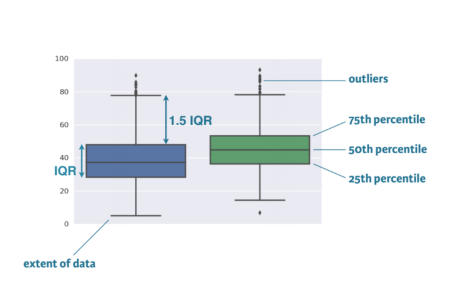

In [22]:
show(r"images/box_plot.png")

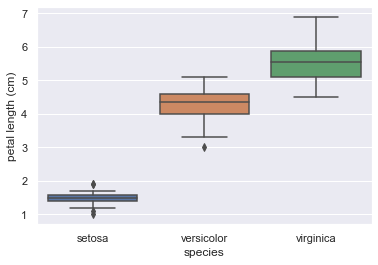

In [23]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

_ = sns.boxplot(x="species", y="petal length (cm)", data=df2)
_ = plt.xlabel("species")
_ = plt.ylabel("petal length (cm)")
plt.show()
# It's not ideal to use box plot on iris dataset due to it's small size.

# Covariance
- Measure of two quantities vary together
<br>
<div style="font-size:1.3em">
Covariance = $\frac{1}{n}\sum_{i=1}^{n}\left(x_i-\bar{x}\right)\times\left(y_i-\bar{y}\right)$
</div>

## Pearson correlation coefficient
```Covariance is not a dimensionless quantity, therefore we oftenly use pearson correlation coefficient.
Range:-1 to 1```
<br>
<div style="font-size:1.3em">
$\rho$ = Pearson Correlation = $\frac{covariance}{\left(std\ of\ x\right)\left(std\ of\ y\right)}$
 = $\frac{variability\ due\ to\ codependence}{independent\ variability}$
</div>

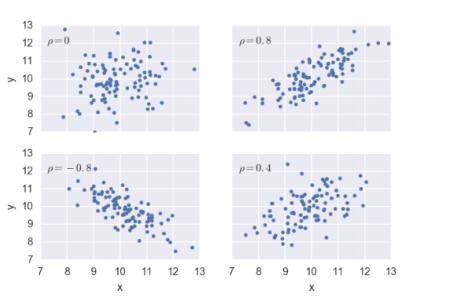

In [24]:
show(r"images/pearson_correlation.png")

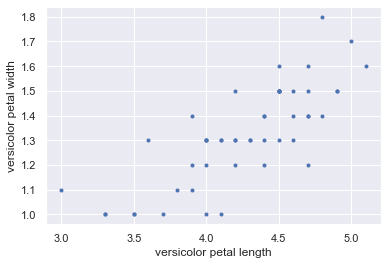

In [25]:
versicolor_petal_width = [X[i][3] for i in range(X.shape[0]) if Y[i] == 1]

# Make a scatter plot
_ = plt.plot(
    versicolor_petal_length, versicolor_petal_width, marker=".", linestyle="none"
)

_ = plt.xlabel("versicolor petal length")
_ = plt.ylabel("versicolor petal width")
plt.show()

```The covariance may be computed using the Numpy function np.cov(). For example, we have two sets of data x and y, np.cov(x, y) returns a 2D array where entries [0,1] and [1,0] are the covariances. Entry [0,0] is the variance of the data in x, and entry [1,1] is the variance of the data in y.```

In [26]:
# Compute the covariance matrix: covariance_matrix
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print(covariance_matrix)

# Extract covariance of length and width of petals: petal_cov
petal_cov = covariance_matrix[0, 1]
print(petal_cov)

[[0.22081633 0.07310204]
 [0.07310204 0.03910612]]
0.07310204081632653


In [27]:
# Pearson Correalation Coefficient: pearson_r
def pearson_r(x, y):
    corr_mat = np.corrcoef(x, y)
    return corr_mat[0, 1]


# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print(r)

0.7866680885228169
